## Install and Read CSV File

In [5]:
! pip install pandas-profiling --quiet

In [1]:
from urllib.request import urlretrieve
import pandas as pd

In [2]:
# Retreive the Data CSV file and read it
# medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
# urlretrieve(medical_charges_url, 'medical.csv')
medical_df = pd.read_csv('medical.csv')

# Basic display of data
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# Display data type information
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Display statistical information
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratiory Analysis and Visualisation

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [10]:
! pip install plotly matplotlib seaborn --quiet

In [3]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Setting defaults stylel and theme
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

In [6]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [5]:
# histogram for age
fig = px.histogram(medical_df, 
                   x = 'age', 
                   marginal = 'box', 
                   nbins = 47, 
                   title = 'Distribution of Age')
fig.update_layout(bargap = 0.1)
fig.show()

### BMI

In [8]:
# histogram for BMI
fig = px.histogram(medical_df, 
                   x = 'bmi', 
                   marginal = 'box', 
                   color_discrete_sequence = ['red'], 
                   title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

### Charges

In [9]:
# histogram for charges for smokers vs non-smokers
fig = px.histogram(medical_df, 
                   x = 'charges', 
                   marginal = 'box', 
                   color = 'smoker', 
                   color_discrete_sequence = ['green', 'grey'], 
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

### Sex

In [10]:
# histogram for Sex
fig = px.histogram(medical_df, 
                   x = 'charges', 
                   marginal = 'box',
                   color = 'sex',
                   color_discrete_sequence = ['blue', 'pink'], 
                   title = 'Distribution of Sex')
fig.update_layout(bargap = 0.1)
fig.show()

### Region

In [20]:
# histogram for Region
fig = px.histogram(medical_df, 
                   x = 'charges', 
                   marginal = 'box',
                   color = 'region',
                   opacity = 0.6,
                   color_discrete_sequence = ['red', 'green', 'blue', 'yellow'], 
                   title = 'Distribution of Region')
fig.update_layout(bargap = 0.1)
fig.show()

### Smoker

In [12]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
px.histogram(medical_df, 
            x = 'smoker', 
            color = 'sex', 
            title = 'Smoker')

### Age vs Charges

In [14]:
fig = px.scatter(medical_df, 
                 x = 'age', 
                 y = 'charges', 
                 color = 'smoker', 
                 opacity = 0.8, 
                 hover_data = ['sex'], 
                 title = 'Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

### BMI vs Charges

In [15]:
fig = px.scatter(medical_df, 
                 x = 'bmi', 
                 y = 'charges', 
                 color = 'smoker', 
                 opacity = 0.8, 
                 hover_data = ['sex'], 
                 title = 'BMI vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

### Sex vs Charges

In [27]:
# Violin plot using plotly express
fig = px.violin(medical_df, 
                x = 'sex', 
                y = 'charges', 
                box = True, 
                points = 'all', 
                title = 'Charges by Region')
fig.show()

### Children vc Charges

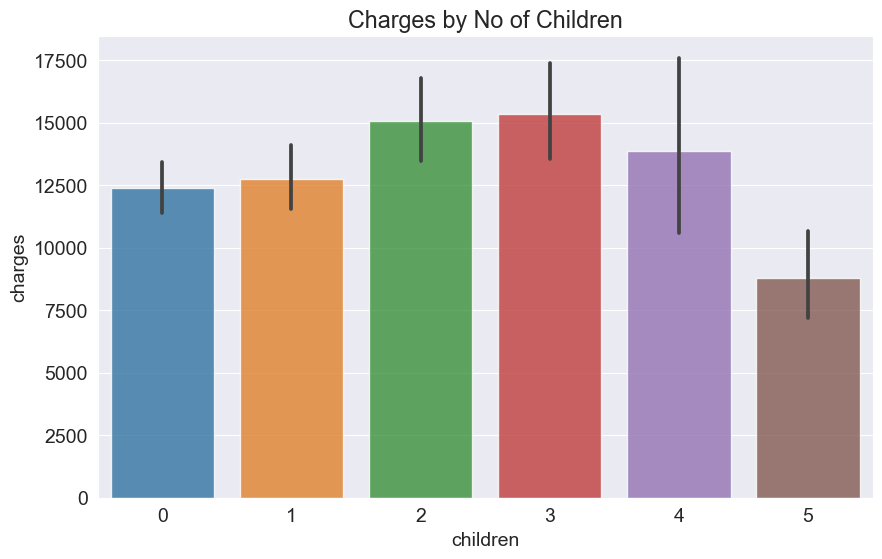

In [31]:
# Bar plot using seaborn
sns.barplot(data = medical_df,
            alpha = 0.8, 
            x = 'children', 
            y = 'charges')
plt.title('Charges by No of Children')
plt.show()

### Correlation

In [28]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [29]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [30]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

<img src="https://i.imgur.com/3XUpDlw.png" width="360">
<img src="https://i.imgur.com/unapugP.png" width="360">

In [39]:
# Because non numeric values were giving errors.
medical_df_encoded = pd.get_dummies(medical_df)
medical_df_encoded.corr().round(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.00,0.11,0.04,0.30,0.02,-0.02,0.03,-0.03,0.00,-0.00,-0.01,0.01
bmi,0.11,1.00,0.01,0.20,-0.05,0.05,-0.00,0.00,-0.14,-0.14,0.27,-0.01
children,0.04,0.01,1.00,0.07,-0.02,0.02,-0.01,0.01,-0.02,0.02,-0.02,0.02
charges,0.30,0.20,0.07,1.00,-0.06,0.06,-0.79,0.79,0.01,-0.04,0.07,-0.04
sex_female,0.02,-0.05,-0.02,-0.06,1.00,-1.00,0.08,-0.08,0.00,0.01,-0.02,0.00
sex_male,-0.02,0.05,0.02,0.06,-1.00,1.00,-0.08,0.08,-0.00,-0.01,0.02,-0.00
smoker_no,0.03,-0.00,-0.01,-0.79,0.08,-0.08,1.00,-1.00,-0.00,0.04,-0.07,0.04
smoker_yes,-0.03,0.00,0.01,0.79,-0.08,0.08,-1.00,1.00,0.00,-0.04,0.07,-0.04
region_northeast,0.00,-0.14,-0.02,0.01,0.00,-0.00,-0.00,0.00,1.00,-0.32,-0.35,-0.32
region_northwest,-0.00,-0.14,0.02,-0.04,0.01,-0.01,0.04,-0.04,-0.32,1.00,-0.35,-0.32


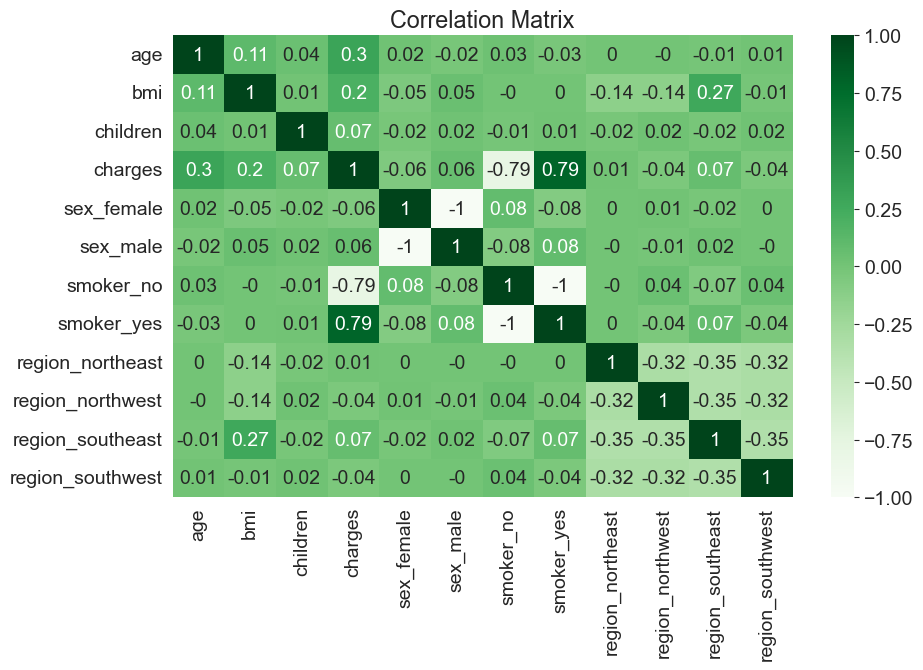

In [38]:
# We are encoding the values because of non-numeric values
medical_df_encoded = pd.get_dummies(medical_df)

# Rounding them off to 2 decimal places
correlation_matrix = medical_df_encoded.corr().round(2) 

sns.heatmap(correlation_matrix, 
            cmap = 'Greens', 
            annot = True)
plt.title('Correlation Matrix');

Correlations do not give cause-effect relations, just relations between 2 variables

## Linear Regression using Single Feature

In [40]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

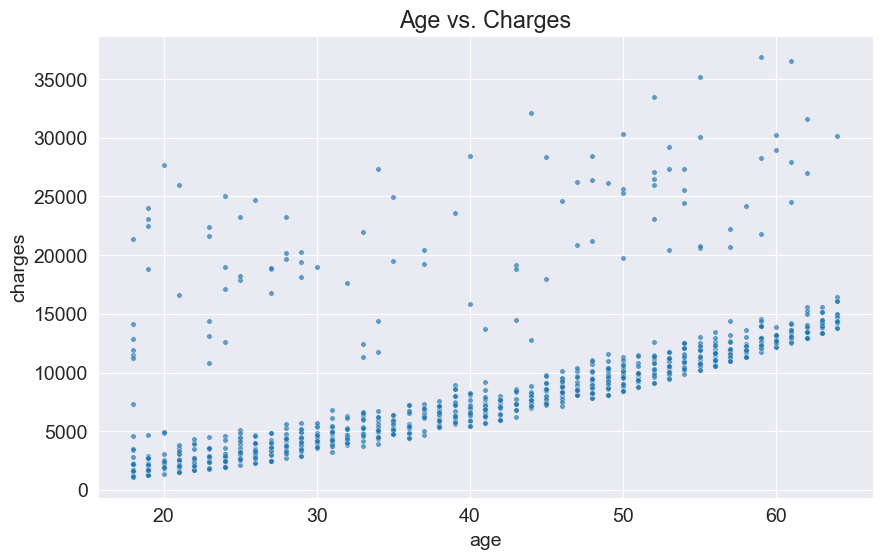

In [41]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, 
                x='age', 
                y='charges', 
                alpha=0.7, 
                s=15);

In [42]:
def estimate_charges(age, w, b):
    return w * age + b

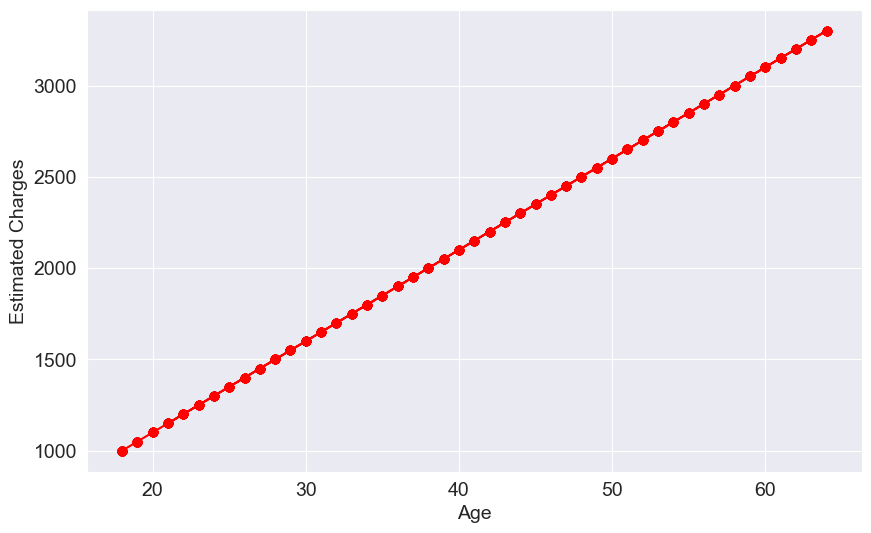

In [44]:
w = 50
b = 100

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

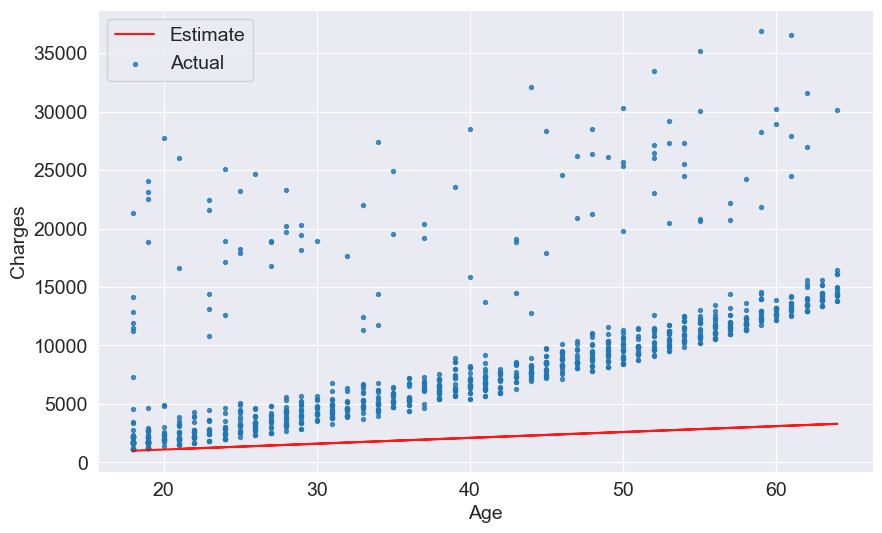

In [45]:
target = non_smoker_df.charges

plt.plot(ages, 
         estimated_charges, 
         'r', 
         alpha=0.9);

plt.scatter(ages, 
            target, 
            s=8,
            alpha=0.8);

plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [73]:
def try_parameters(w, b, color = 'r'):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, 
             estimated_charges, 
             color, 
             alpha=0.9);
    
    plt.scatter(ages, 
                target, 
                s=8,
                alpha=0.8);
    
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

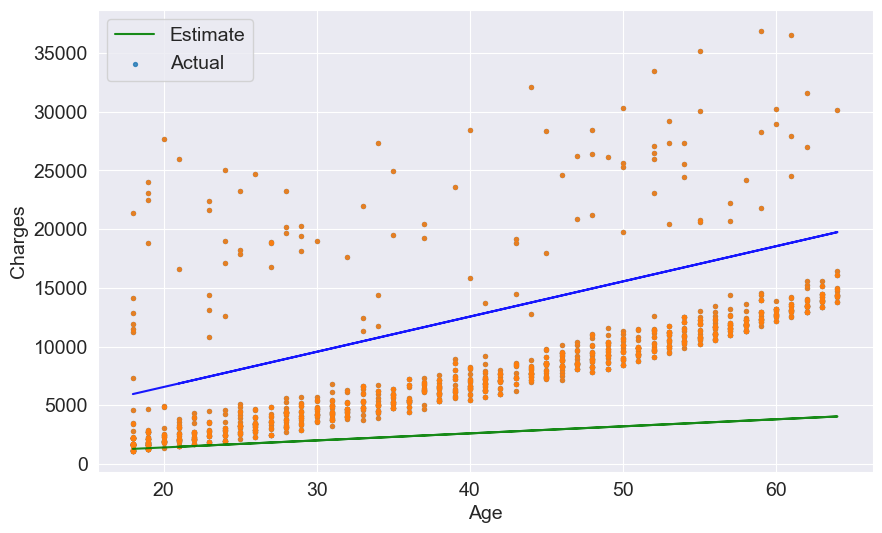

In [68]:
try_parameters(60, 200, 'g')
try_parameters(300, 550, 'b')

### Loss/Cost Function

**Root mean squared error**

<img src="https://i.imgur.com/WCanPkA.png" width="360">

**graph example**

<img src="https://i.imgur.com/ll3NL80.png" width="420">

In [ ]:
! pip install numpy --quiet

In [69]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

8461.949562575493

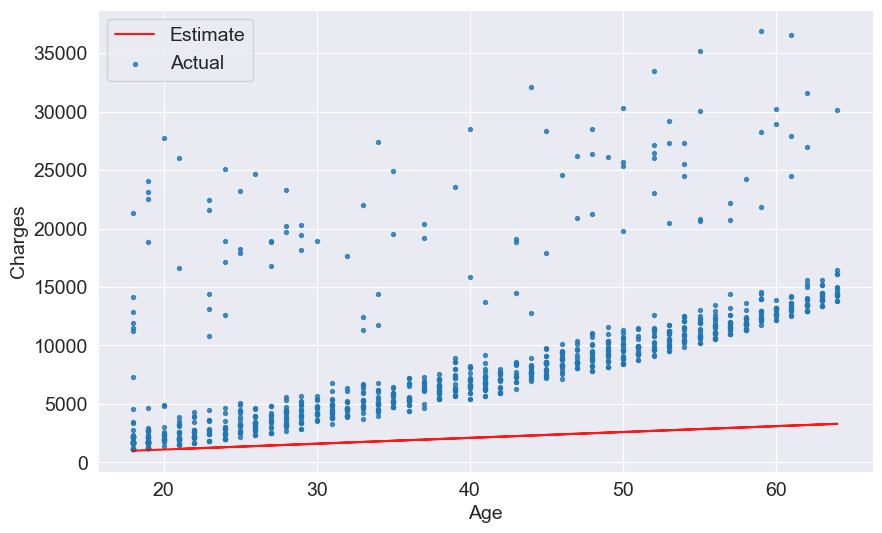

In [74]:
w = 50
b = 100

try_parameters(w, b)

targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

rmse(targets, predicted)

In [76]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 
             'r', 
             alpha=0.9);
    
    plt.scatter(ages, 
                target, 
                s=8,
                alpha=0.8);
    
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


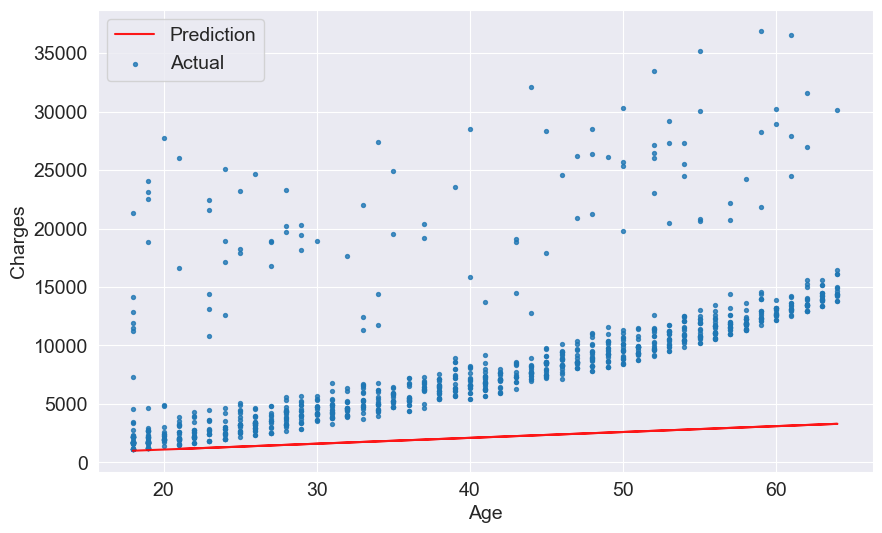

In [77]:
try_parameters(50, 100)

### Optimizer

- Ordinary Least Squares (better for smaller databases)
- Stocastic Gradient Descenct (better for larger databases)
<br>
#### Visualisation

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

### Linear Regression using Scikit-learn

In [ ]:
! pip install scikit-learn --quiet

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [79]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

model.fit(inputs, targets)

model.predict(np.array([[23], 
                        [37], 
                        [61]]))

predictions = model.predict(inputs)

rmse(targets, predictions)

inputs.shape : (1064, 1)
targes.shape : (1064,)


/Users/hardaatsinghbaath/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



4662.505766636395

W[267.24891283]
b-2091.420556565021
RMSE Loss:  4662.505766636395


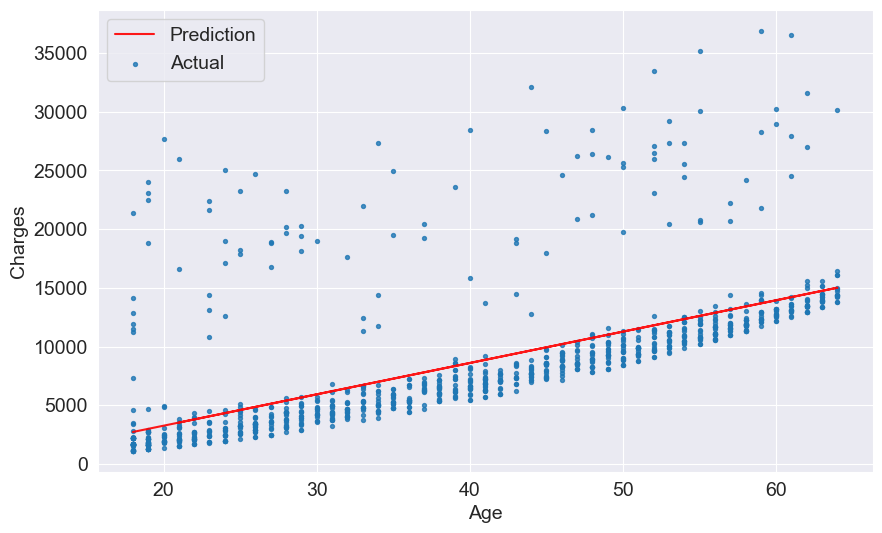

In [85]:
# w
print("W:  " + str(model.coef_))

# b
print("b:  " + str(model.intercept_))

try_parameters(model.coef_, model.intercept_)

RMSE Loss (SGD): 11709.224359001548
W:  [267.24891283]
b:  -2091.420556565021
RMSE Loss:  4662.505766636395


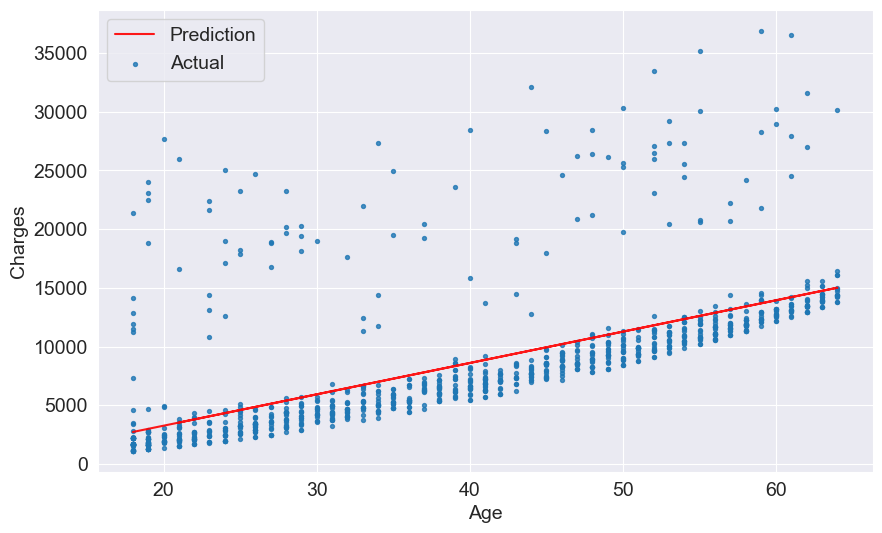

In [86]:
from sklearn.linear_model import SGDRegressor

# Create an instance of SGDRegressor
model_sgd = SGDRegressor()

# Fit the model using the inputs and targets
model_sgd.fit(inputs, targets)

# Make predictions
predictions_sgd = model_sgd.predict(inputs)

# Compute loss (RMSE)
loss_sgd = rmse(targets, predictions_sgd)

# Print the loss
print("RMSE Loss (SGD):", loss_sgd)

# w
print("W:  " + str(model.coef_))

# b
print("b:  " + str(model.intercept_))

try_parameters(model.coef_, model.intercept_)


### Machine Learning:

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

Visualisation:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

In [87]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


## Linear Regression using Multiple Features

In [88]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [89]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833271

In [90]:
fig = px.scatter(non_smoker_df, 
                 x='bmi', 
                 y='charges', 
                 title='BMI vs. Charges')

fig.update_traces(marker_size=5)
fig.show()

In [92]:
fig = px.scatter_3d(non_smoker_df, 
                    x='age', 
                    y='bmi', 
                    z='charges')

fig.update_traces(marker_size=3, 
                  marker_opacity=0.5)

fig.show()

In [93]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488036)

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

In [94]:
fig = px.strip(non_smoker_df, 
               x='children', 
               y='charges', 
               title= "Children vs. Charges")

fig.update_traces(marker_size=4, 
                  marker_opacity=0.7)
fig.show()

In [95]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [96]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


## Using Categorical Features for Machine Learning

### Binary Categories

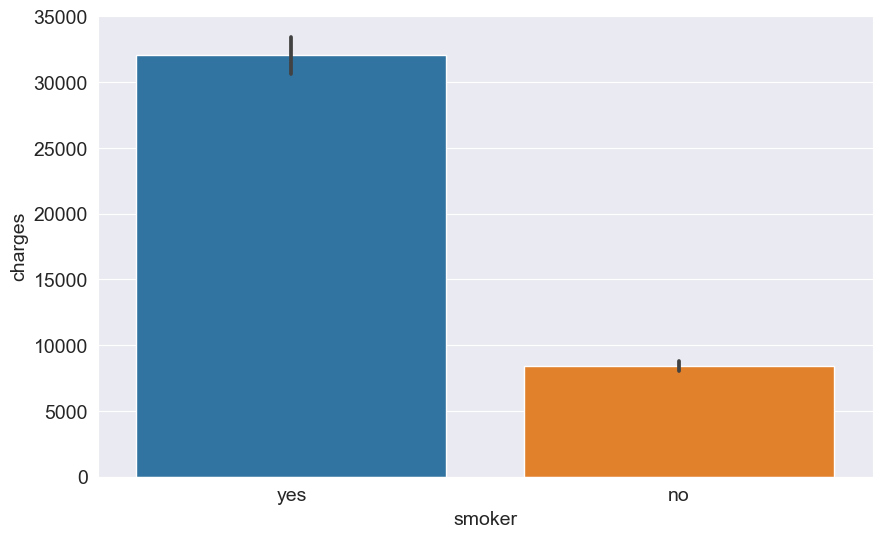

In [97]:
sns.barplot(data=medical_df, 
            x='smoker', 
            y='charges');

In [99]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

print("Correlation: "+str(medical_df.charges.corr(medical_df.smoker_code)))

medical_df

Correlation: 0.7872514304984778


,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [100]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<Axes: xlabel='sex', ylabel='charges'>

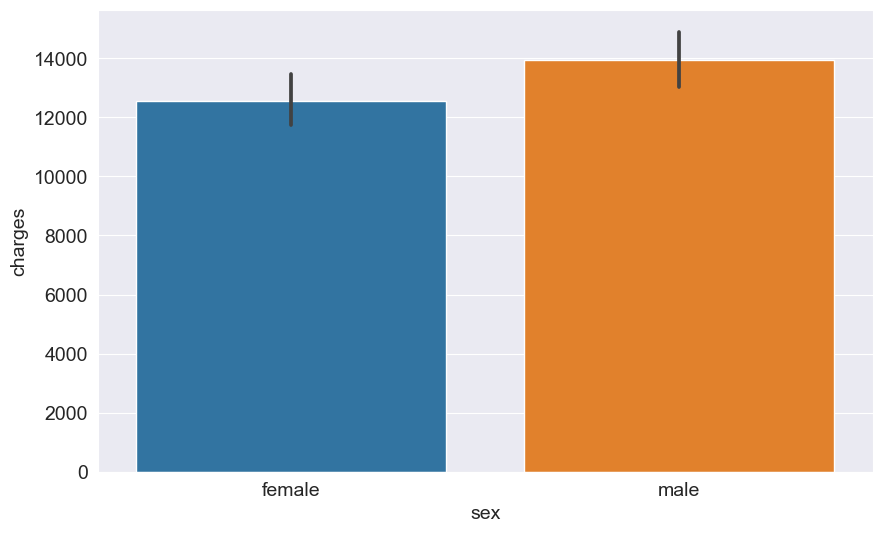

In [101]:
sns.barplot(data=medical_df, 
            x='sex', 
            y='charges')

In [102]:
sex_codes = {'female': 0, 'male': 1}

medical_df['sex_code'] = medical_df.sex.map(sex_codes)

print("Correlation: " + str(medical_df.charges.corr(medical_df.sex_code)))

Correlation: 0.05729206220202533


In [103]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


### One-hot Encoding

![](https://i.imgur.com/n8GuiOO.png)

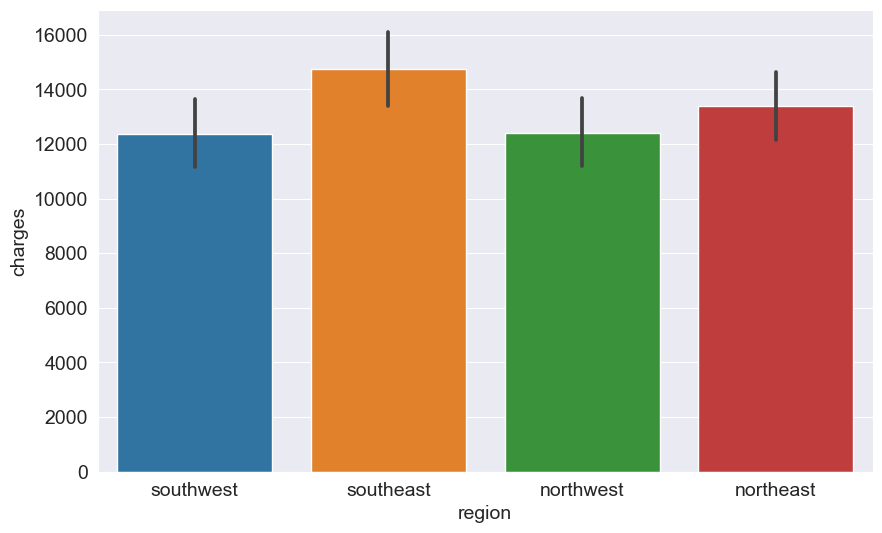

In [104]:
sns.barplot(data=medical_df, 
            x='region', 
            y='charges');

In [105]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [106]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [107]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [108]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


## Model Improvements

### Feature Scaling
$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [110]:
print("Model Coeff: " + str(model.coef_))
print("Model Intercept: " + str(model.intercept_))

Model Coeff: [  256.85635254   339.19345361   475.50054515 23848.53454191
  -131.3143594    587.00923503   234.0453356   -448.01281436
  -373.04175627]
Model Intercept: -12525.547811195473


In [111]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


![](https://i.imgur.com/dT5fLFI.png)

In [112]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [113]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [114]:
print("Scaler Mean: "+ str(scaler.mean_))
print("Scaler Variance: "+ str(scaler.var_))

Scaler Mean: [39.20702541 30.66339686  1.09491779]
Scaler Variance: [197.25385199  37.16008997   1.45212664]


In [115]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [116]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [117]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


## Create a Test Set

In [118]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6226.370737302758


In [119]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6044.365449473646
